In [1]:
from dateutil.parser import parse
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import as Dataframe
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col = ['date'])
data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
# ADF Test
adf_test = adfuller(data['value'] , autolag='AIC')
adf_test[1]

1.0

In [6]:
#The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than 
#the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.
# So p value is > 0.05% so we cannot reject the null hypothesis so the Series is not Stationary

In [7]:
data['1st_value'] = data.diff()
data.head()

,value,1st_value
date,,
1991-07-01,3.526591,NaN
1991-08-01,3.180891,-0.345700
1991-09-01,3.252221,0.071330
1991-10-01,3.611003,0.358782
1991-11-01,3.565869,-0.045134


In [8]:
# ADF Test
adf_test = adfuller(data['1st_value'].dropna() , autolag='AIC')
adf_test[1]

0.11665341686470398

In [9]:
data['2nd_value'] = data['value'].diff()
data.head()

,value,1st_value,2nd_value
date,,,
1991-07-01,3.526591,NaN,NaN
1991-08-01,3.180891,-0.345700,-0.345700
1991-09-01,3.252221,0.071330,0.071330
1991-10-01,3.611003,0.358782,0.358782
1991-11-01,3.565869,-0.045134,-0.045134


In [10]:
# ADF Test
adf_test = adfuller(data['2nd_value'].dropna() , autolag='AIC')
adf_test[1]

0.11665341686470398

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df.head()

,value
0,88
1,84
2,85
3,85
4,84


In [16]:
df['1st_value'] = df['value'].diff()
df.head()

,value,1st_value
0,88,NaN
1,84,-4.0
2,85,1.0
3,85,0.0
4,84,-1.0


In [23]:
df['2nd_value'] = df['value'].diff().diff()
df.head()

,value,1st_value,2nd_value
0,88,NaN,NaN
1,84,-4.0,NaN
2,85,1.0,5.0
3,85,0.0,-1.0
4,84,-1.0,-1.0


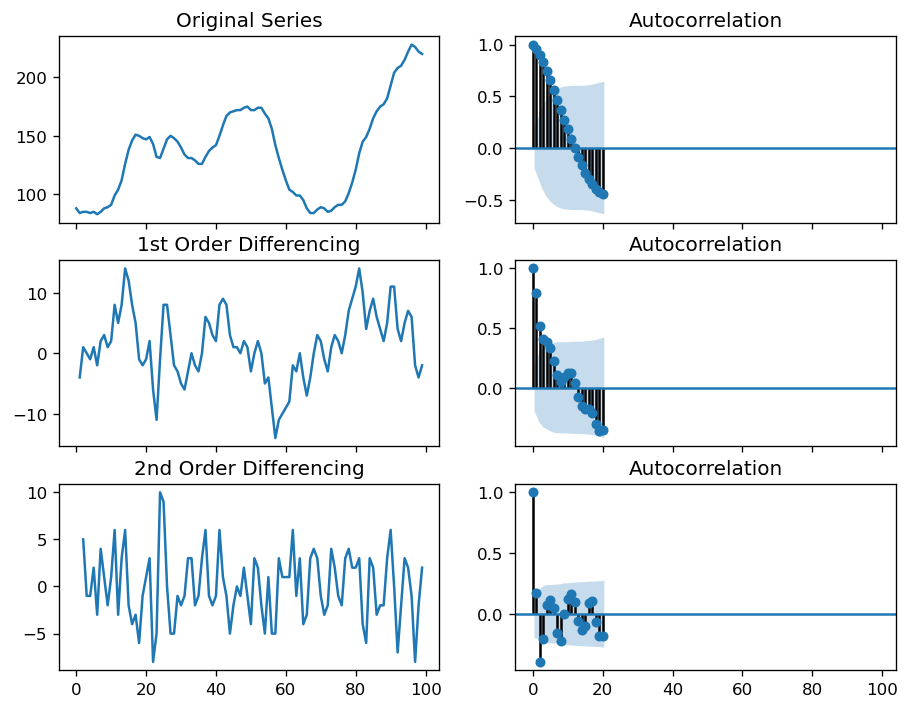

In [36]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

### Finding AR Terms

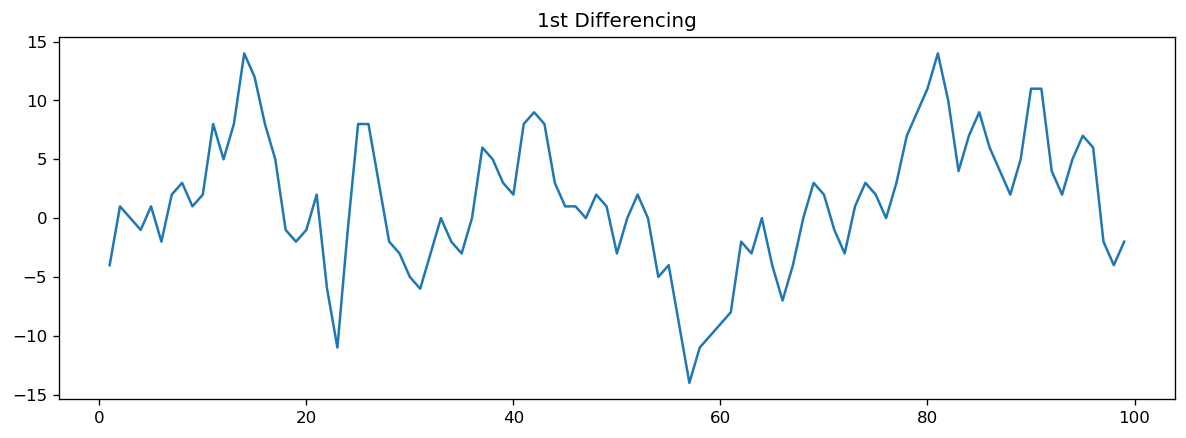

In [45]:
plt.figure(figsize= (12, 4))
plt.plot(df.value.diff())
plt.title('1st Differencing')
plt.show()


<Figure size 1440x480 with 0 Axes>

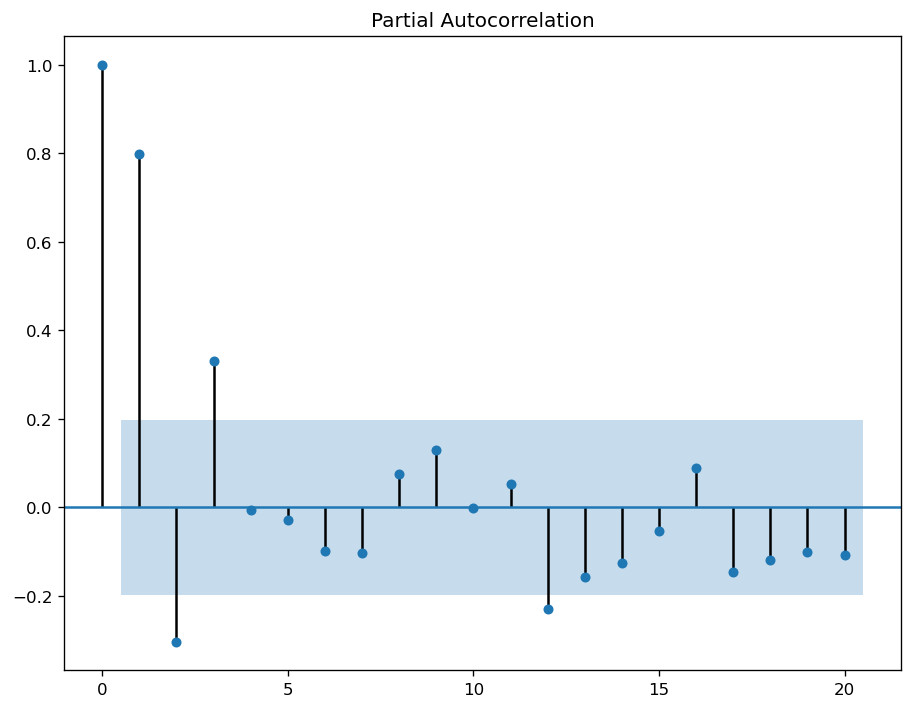

In [48]:
plt.figure(figsize= (12, 4))
plot_pacf(df.value.diff().dropna())
plt.show()

### Find the order of the MA term (q)

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

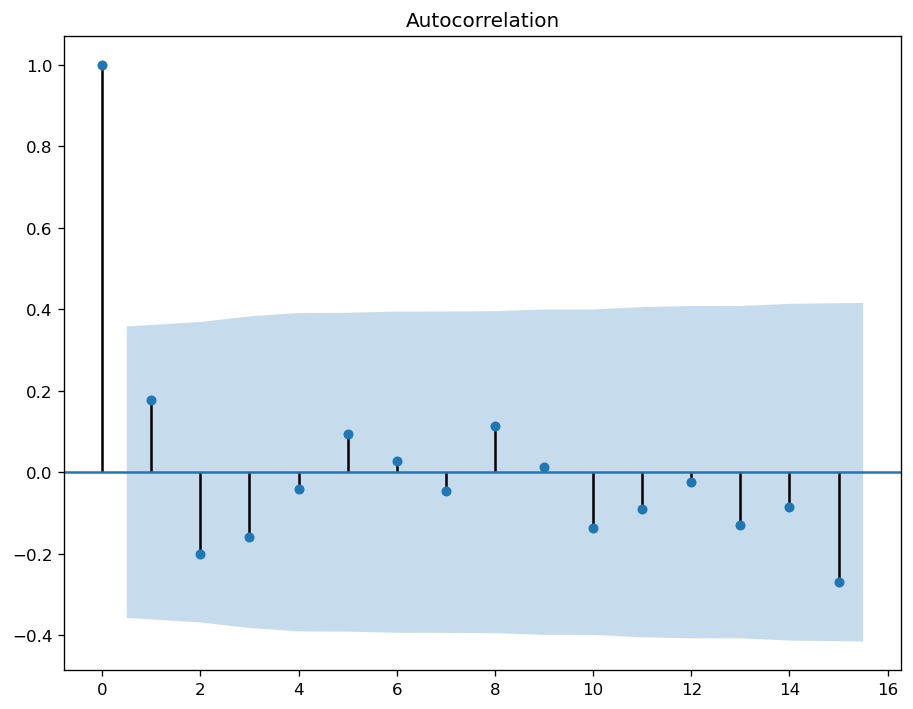

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv',  parse_dates=['date'], index_col = ['date'])
df.head()

plot_acf(df.value.diff().dropna())
plt.show()

## ARIMA Model

In [57]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\My_Programs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\My_Programs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   30
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  11.512
Method:                       css-mle   S.D. of innovations              0.160
Date:                Mon, 17 Aug 2020   AIC                            -13.023
Time:                        23:13:01   BIC                             -6.017
Sample:                    01-01-1981   HQIC                           -10.782
                         - 01-01-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1677      0.013     12.997      0.000       0.142       0.193
ar.L1.D.value     0.7104      0.177      4.013      0.000       0.363       1.057
ma.L1.D.value    -0.6119      0.217     

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

Notice here the  MA2 term   P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

### Rebuild the model without the MA2 term

In [58]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  10.322
Method:                       css-mle   S.D. of innovations              0.171
Date:                Mon, 17 Aug 2020   AIC                            -12.645
Time:                        23:16:28   BIC                             -7.040
Sample:                    01-01-1981   HQIC                           -10.852
                         - 01-01-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1540      0.037      4.158      0.000       0.081       0.227
ar.L1.D.value    -0.2906      0.481     -0.604      0.546      -1.233       0.652
ma.L1.D.value     0.5350      0.414     

C:\My_Programs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\My_Programs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


### Plotting Residuals

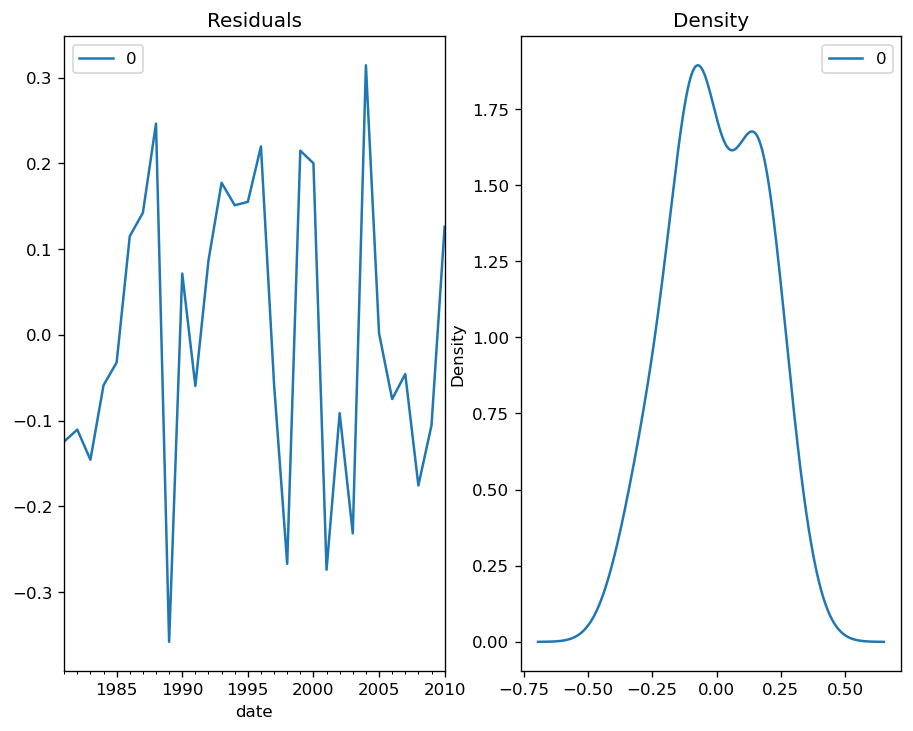

In [61]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().



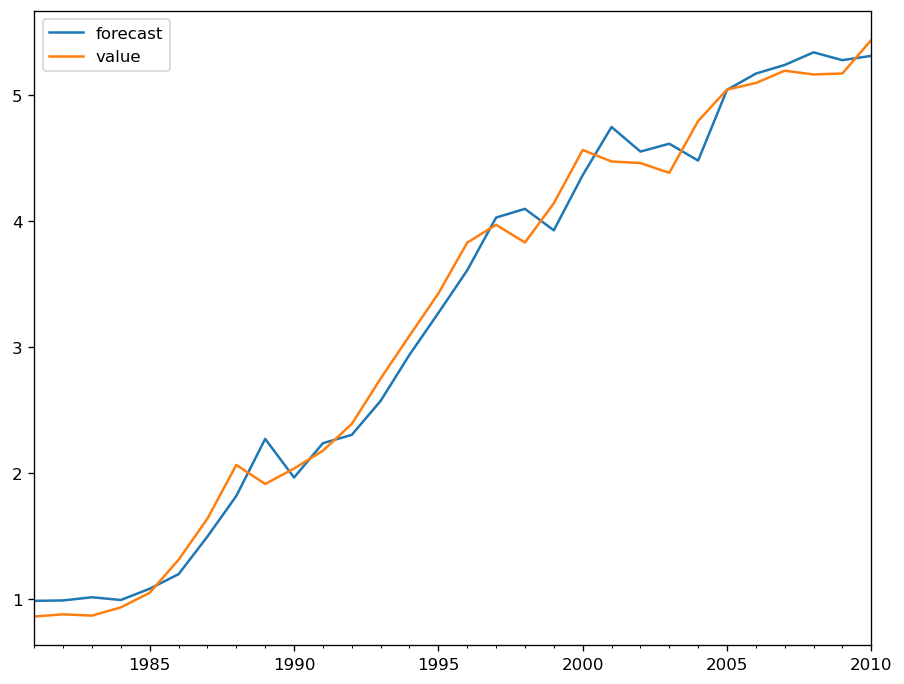

In [62]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### Evaluation

In [63]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})